In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import SimpSOM as sps
import pyFTS
import os
from PIL import Image
from matplotlib import cm

# Previsão de radiação solar com SOM e FTS

Notebook para testes de previsão de séries temporais de radiação solar utilizando SOM para redução de dimensionalidade de imagens e abordagem FTS para previsão de dados

In [2]:
df = pd.read_csv('irradiation.csv')

In [3]:
df.head()

,DATE (MM/DD/YYYY),MST,Global CMP22-1 (cor) [W/m^2]
0,10/19/2020,06:18,4.43539
1,10/19/2020,06:19,4.98750
2,10/19/2020,06:20,5.41359
3,10/19/2020,06:21,5.91607
4,10/19/2020,06:22,6.59753


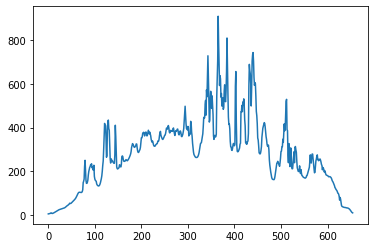

In [4]:
df['Global CMP22-1 (cor) [W/m^2]'].plot();

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE (MM/DD/YYYY)             655 non-null    object 
 1   MST                           655 non-null    object 
 2   Global CMP22-1 (cor) [W/m^2]  655 non-null    float64
dtypes: float64(1), object(2)
memory usage: 15.5+ KB


In [6]:
import sys
sys.path.append("/home/matheus_cascalho/Documentos/matheus_cascalho/MINDS/TimeSeries_Lab/Testes/Utils")
from analyse import Analyser

In [7]:
df.iloc[-1]

DATE (MM/DD/YYYY)               10/19/2020
MST                                  17:12
Global CMP22-1 (cor) [W/m^2]       9.23132
Name: 654, dtype: object

In [8]:
an = Analyser(df['Global CMP22-1 (cor) [W/m^2]'], freq=60)

In [9]:
print(an)

A série é não-estacionária!!
As variâncias das sub-amostras não são iguais



In [10]:
an.stats()

count      655.000000
mean       279.812298
std        159.404151
min          4.435390
25%        175.443000
50%        276.648000
75%        373.953000
max        910.307000
Esp        279.812298
Var      25370.890014
dtype: float64

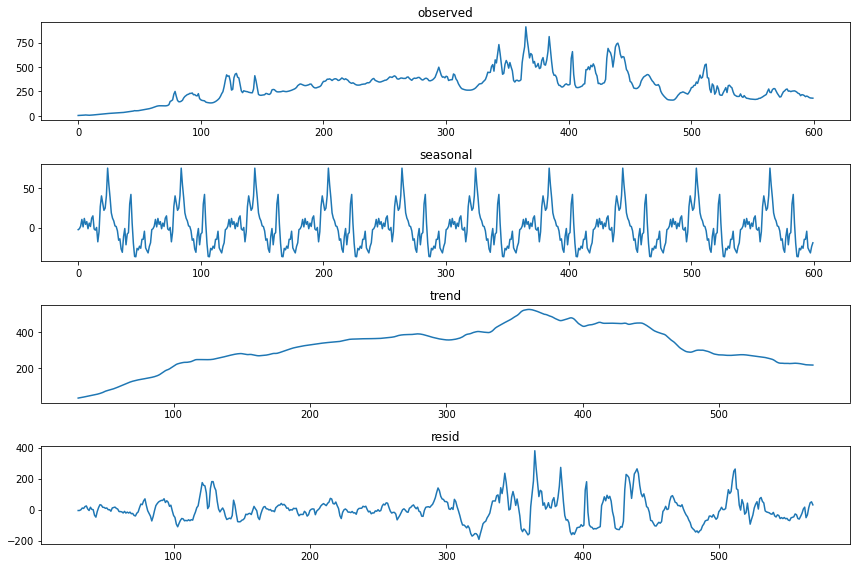

In [12]:
an.plot_decomposition('observed', 'seasonal', 'trend', 'resid', data_range=(0,600));

In [13]:
an.homoscedasticity()

,Dataset,Levene Statistic,p-value,Result,Cedasticidade
0,DATA,14.800504,0.000131,H0 Rejected,Heterocedástica


# Previsão univariante

In [14]:
data = df['Global CMP22-1 (cor) [W/m^2]']

/home/matheus_cascalho/.virtualenvs/TimeSeries_Lab/lib/python3.8/site-packages/pyFTS/partitioners/partitioner.py:278: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(ticks)


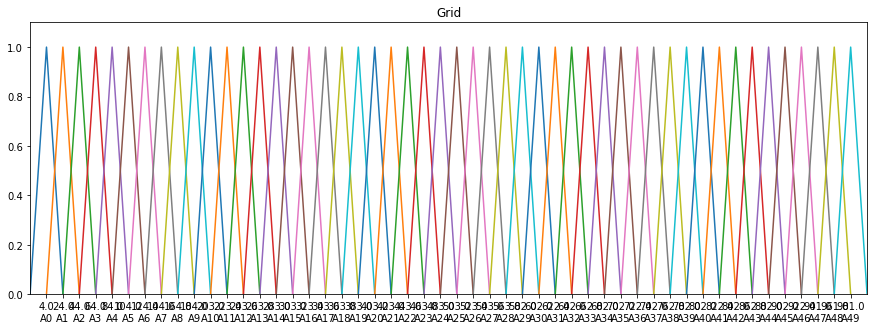

In [34]:
from pyFTS.partitioners import Grid

part = Grid.GridPartitioner(data=data,
                            npart=50)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

part.plot(ax);

In [35]:
from pyFTS.models import chen

chen_model = chen.ConventionalFTS(partitioner=part)
chen_model.fit(data.values)
print(chen_model)

Conventional FTS:
A0 -> A0,A1
A1 -> A0,A1,A2
A2 -> A1,A2,A3
A3 -> A2,A3,A4
A4 -> A3,A4,A5
A5 -> A4,A5,A6
A6 -> A5,A6,A7
A7 -> A6,A7,A8
A8 -> A11,A7,A8,A9
A9 -> A10,A8,A9
A10 -> A10,A11,A12,A8,A9
A11 -> A10,A11,A12,A13,A9
A12 -> A10,A11,A12,A13,A14,A15,A16
A13 -> A11,A12,A13,A14,A19
A14 -> A11,A12,A13,A14,A15,A20
A15 -> A11,A12,A14,A15,A16,A17,A18
A17 -> A15,A16,A17,A18
A19 -> A14,A16,A18,A19,A20,A21
A16 -> A13,A14,A15,A16,A17,A19,A23,A29
A18 -> A13,A14,A16,A17,A18,A19,A20,A21,A27,A29
A20 -> A16,A17,A18,A19,A20,A21,A22,A23
A21 -> A16,A17,A19,A20,A21,A22,A23
A22 -> A20,A21,A22,A25,A26
A23 -> A18,A21,A23,A25,A26,A29
A26 -> A19,A23,A25,A26,A28
A25 -> A22,A23,A24,A25,A26,A27,A29
A24 -> A23,A24,A26,A27,A28
A27 -> A21,A24,A25,A28,A32
A28 -> A22,A25,A27,A30,A33
A30 -> A25,A26,A27,A30,A32
A31 -> A27,A30
A34 -> A28,A33
A33 -> A21,A32,A40
A32 -> A27,A30,A31,A35,A36
A36 -> A32
A29 -> A27,A33,A34,A35
A40 -> A34
A39 -> A35
A35 -> A30,A31,A37,A45
A37 -> A35,A37
A45 -> A39



In [36]:
from pyFTS.models import hofts

hofts_model = hofts.HighOrderFTS(order=2, partitioner=part)
hofts_model.fit(data.values)

print(hofts_model)

High Order FTS:
A2,A0 -> A0,A1
A0,A0 -> A0,A1,A2
A0,A1 -> A0,A1,A2
A1,A0 -> A0,A1,A2
A1,A1 -> A0,A1,A2,A3
A0,A2 -> A1,A2
A1,A2 -> A0,A1,A2,A3
A2,A1 -> A0,A1,A2,A3
A4,A2 -> A1,A2
A3,A1 -> A1,A2
A2,A2 -> A0,A1,A2,A3,A4
A1,A3 -> A2,A3
A3,A2 -> A1,A2,A3,A4
A3,A3 -> A1,A2,A3,A4,A5
A2,A3 -> A2,A3,A4
A4,A3 -> A1,A2,A3,A4,A5
A2,A4 -> A3,A4
A3,A4 -> A2,A3,A4,A5
A5,A3 -> A3,A4
A4,A4 -> A2,A3,A4,A5,A6
A3,A5 -> A4,A5
A4,A5 -> A3,A4,A5,A6
A5,A4 -> A3,A4,A5,A6
A6,A4 -> A4,A5
A4,A6 -> A4,A5,A6
A7,A5 -> A5,A6
A5,A5 -> A3,A4,A5,A6,A7,A8
A6,A6 -> A4,A5,A6,A7,A8
A5,A6 -> A4,A5,A6,A7,A8
A6,A5 -> A4,A5,A6,A7,A8
A6,A7 -> A5,A6,A7,A8
A7,A6 -> A5,A6,A7,A8
A8,A6 -> A6,A7
A7,A7 -> A5,A6,A7,A8,A9
A8,A7 -> A6,A7,A8,A9
A5,A7 -> A7,A8
A5,A8 -> A7,A8
A6,A8 -> A7,A8
A13,A9 -> A7,A8
A9,A7 -> A7,A8
A10,A7 -> A7,A8
A10,A8 -> A7,A8,A9
A11,A8 -> A8,A9
A12,A8 -> A8,A9
A7,A8 -> A10,A11,A6,A7,A8,A9
A8,A8 -> A10,A11,A6,A7,A8,A9
A12,A9 -> A10,A7,A8,A9
A9,A8 -> A10,A7,A8,A9
A11,A9 -> A10,A8,A9
A13,A10 -> A10,A11,A7,A8
A7,A9 -> 

In [41]:
from pyFTS.models import pwfts

pwfts_model = pwfts.ProbabilisticWeightedFTS(order=2, partitioner=part)
pwfts_model.fit(data.values)

print(pwfts_model)

Probabilistic FTS:
(0.017) A0,A0 -> (0.749)A0, (0.251)A1, (0.0)A2
(0.007) A0,A1 -> (0.525)A0, (0.474)A1, (0.001)A2
(0.0) A0,A2 -> (0.932)A1, (0.068)A2
(0.007) A1,A0 -> (0.559)A0, (0.441)A1, (0.0)A2
(0.034) A1,A1 -> (0.095)A0, (0.727)A1, (0.178)A2, (0.0)A3
(0.011) A1,A2 -> (0.0)A0, (0.534)A1, (0.464)A2, (0.001)A3
(0.0) A1,A3 -> (0.908)A2, (0.092)A3
(0.018) A10,A10 -> (0.408)A10, (0.342)A11, (0.056)A12, (0.003)A13, (0.005)A8, (0.185)A9
(0.014) A10,A11 -> (0.225)A10, (0.331)A11, (0.265)A12, (0.064)A13, (0.002)A14, (0.028)A8, (0.085)A9
(0.002) A10,A12 -> (0.052)A10, (0.081)A11, (0.115)A12, (0.469)A13, (0.077)A14, (0.049)A15, (0.011)A16, (0.045)A8, (0.102)A9
(0.0) A10,A13 -> (0.208)A10, (0.005)A12, (0.281)A13, (0.386)A14, (0.065)A15, (0.014)A16, (0.041)A9
(0.0) A10,A7 -> (0.951)A7, (0.049)A8
(0.001) A10,A8 -> (0.832)A7, (0.092)A8, (0.075)A9
(0.007) A10,A9 -> (0.288)A10, (0.093)A11, (0.002)A12, (0.119)A8, (0.497)A9
(0.012) A11,A10 -> (0.485)A10, (0.262)A11, (0.058)A12, (0.003)A13, (0.002)A8,

In [42]:
from pyFTS.benchmarks import Measures

chen_forecast = chen_model.predict(data.values)
chen_forecast.insert(0, None)
chen_stats = Measures.get_point_statistics(data.values, chen_model)

hofts_forecast = hofts_model.predict(data.values)
hofts_stats = Measures.get_point_statistics(data.values, hofts_model)

pwfts_forecast = pwfts_model.predict(data.values)
pwfts_stats = Measures.get_point_statistics(data.values, pwfts_model)

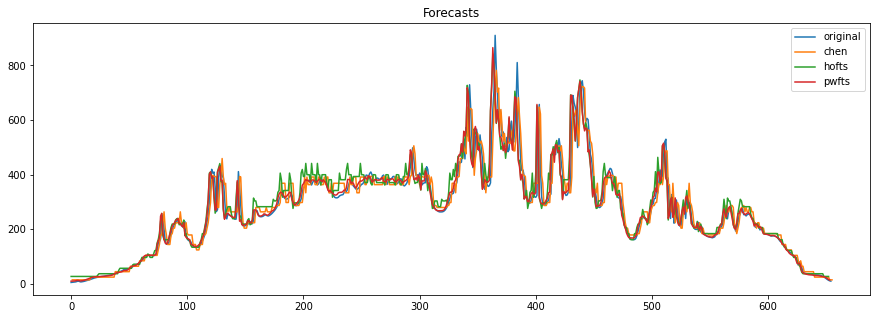

In [43]:
plt.figure(figsize=(15,5))

plt.plot(data.values, label='original')
plt.plot(chen_forecast, label='chen')
plt.plot(hofts_forecast, label='hofts')
plt.plot(pwfts_forecast, label='pwfts')

plt.title('Forecasts')
plt.legend();

In [44]:
pd.DataFrame([chen_stats, hofts_stats, pwfts_stats], 
             index=['chen', 'hofts', 'pwfts'], 
             columns=['RMSE', 'MAPE', 'U'])

,RMSE,MAPE,U
chen,37.09,11.12,1.02
hofts,30.72,14.56,0.84
pwfts,26.28,6.49,0.72
